This notebook explores sales, profit, and shipping patterns using the Superstore dataset. Insights are drawn from descriptive statistics and visualizations to identify opportunities for optimization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/raw/superstore.csv')

df.head()

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32
3,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,111,Consumer,2011-08-09 00:00:00.000,Standard Class,4.59,California,Paper,2011,North America,32
4,Office Supplies,Los Angeles,United States,AP-109154,Arthur Prichep,0.0,US,1,2011-09-29 00:00:00.000,CA-2011-146969,...,6,Consumer,2011-10-03 00:00:00.000,Standard Class,1.32,California,Paper,2011,North America,40


## Explore and clean the dataset
I check the shape of the dataset, data types, and whether there are any missing values.

In [2]:
# Check column names, types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   记录数             51290 non-null  int64  
 8   Order.Date      51290 non-null  object 
 9   Order.ID        51290 non-null  object 
 10  Order.Priority  51290 non-null  object 
 11  Product.ID      51290 non-null  object 
 12  Product.Name    51290 non-null  object 
 13  Profit          51290 non-null  float64
 14  Quantity        51290 non-null  int64  
 15  Region          51290 non-null  object 
 16  Row.ID          51290 non-null  int64  
 17  Sales           51290 non-null 

In [3]:
df.duplicated().sum()

np.int64(0)

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.isnull().sum()

Category          0
City              0
Country           0
Customer.ID       0
Customer.Name     0
Discount          0
Market            0
记录数               0
Order.Date        0
Order.ID          0
Order.Priority    0
Product.ID        0
Product.Name      0
Profit            0
Quantity          0
Region            0
Row.ID            0
Sales             0
Segment           0
Ship.Date         0
Ship.Mode         0
Shipping.Cost     0
State             0
Sub.Category      0
Year              0
Market2           0
weeknum           0
dtype: int64

In [6]:
# Convert date columns to datetime format
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [7]:
# Create Shipping Time in days column
df['Shipping.Time'] = (df['Ship.Date'] - df['Order.Date']).dt.days 

In [8]:
# Create Profit Margin column
df['Profit.Margin'] = df['Profit'] / df['Sales']

In [9]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum', 'Shipping.Time',
       'Profit.Margin'],
      dtype='object')

## Exploratory Data Analysis (EDA)
I analyze patterns, trends, and relationships between key variables.

In [10]:
df.describe()

C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Discount,记录数,Order.Date,Profit,Quantity,Row.ID,Sales,Ship.Date,Shipping.Cost,Year,weeknum,Shipping.Time,Profit.Margin
count,51290.000000,51290.0,51290,51290.000000,51290.000000,51290.00000,51290.000000,51290,51290.000000,51290.000000,51290.000000,51290.000000,5.129000e+04
mean,0.142908,1.0,2013-05-11 21:26:49.155780864,28.610982,3.476545,25645.50000,246.498440,2013-05-15 20:42:42.745174784,26.375818,2012.777208,31.287112,3.969370,-inf
min,0.000000,1.0,2011-01-01 00:00:00,-6599.978000,1.000000,1.00000,0.000000,2011-01-03 00:00:00,0.002000,2011.000000,1.000000,0.000000,-inf
25%,0.000000,1.0,2012-06-19 00:00:00,0.000000,2.000000,12823.25000,31.000000,2012-06-23 00:00:00,2.610000,2012.000000,20.000000,3.000000,0.000000e+00
50%,0.000000,1.0,2013-07-08 00:00:00,9.240000,3.000000,25645.50000,85.000000,2013-07-12 00:00:00,7.790000,2013.000000,33.000000,4.000000,1.692486e-01
75%,0.200000,1.0,2014-05-22 00:00:00,36.810000,5.000000,38467.75000,251.000000,2014-05-26 00:00:00,24.450000,2014.000000,44.000000,5.000000,3.331111e-01
max,0.850000,1.0,2014-12-31 00:00:00,8399.976000,14.000000,51290.00000,22638.000000,2015-01-07 00:00:00,933.570000,2014.000000,53.000000,7.000000,5.828000e-01
std,0.212280,0.0,NaN,174.340972,2.278766,14806.29199,487.567175,NaN,57.296810,1.098931,14.429795,1.729437,NaN


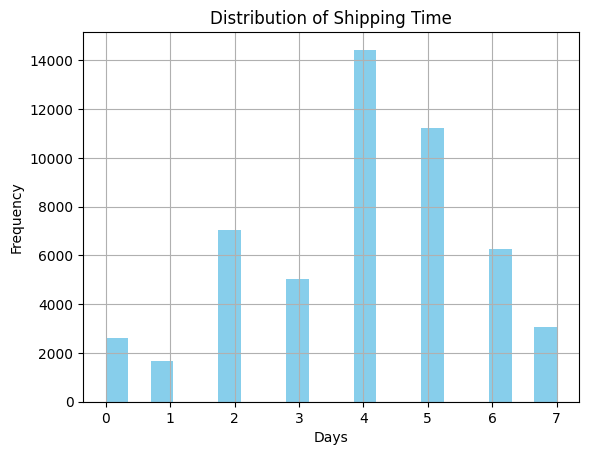

In [11]:
# Check the distribution of Shipping Time
df['Shipping.Time'].hist(bins=20, color='skyblue')
plt.title('Distribution of Shipping Time')
plt.xlabel('Days')
plt.ylabel('Frequency')
plt.show()

### ⏱️ Shipping Time Distribution — Interpretation

The majority of orders are shipped within a 4 days or less, but there are some with longer delivery times.  
Outliers in shipping time may indicate potential delays or logistical inefficiencies worth investigating.

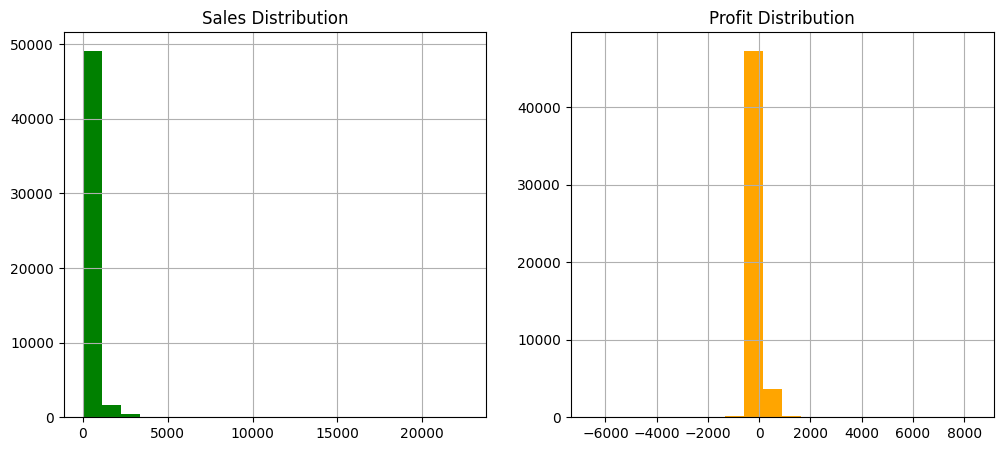

In [12]:
# Check the distribution of Sales and Profit
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
df['Sales'].hist(bins=20, color='green')
plt.title('Sales Distribution')

plt.subplot(1,2,2)
df['Profit'].hist(bins=20, color='orange')
plt.title('Profit Distribution')

plt.show()

### 📊 Sales and Profit Distribution — Interpretation

Both Sales and Profit distributions are highly right-skewed.
Most transactions involve small sales and minimal profit, while a small number of large orders have a major impact on overall revenue.
The presence of negative profit values indicates potential inefficiencies or unprofitable sales segments that should be further analyzed.

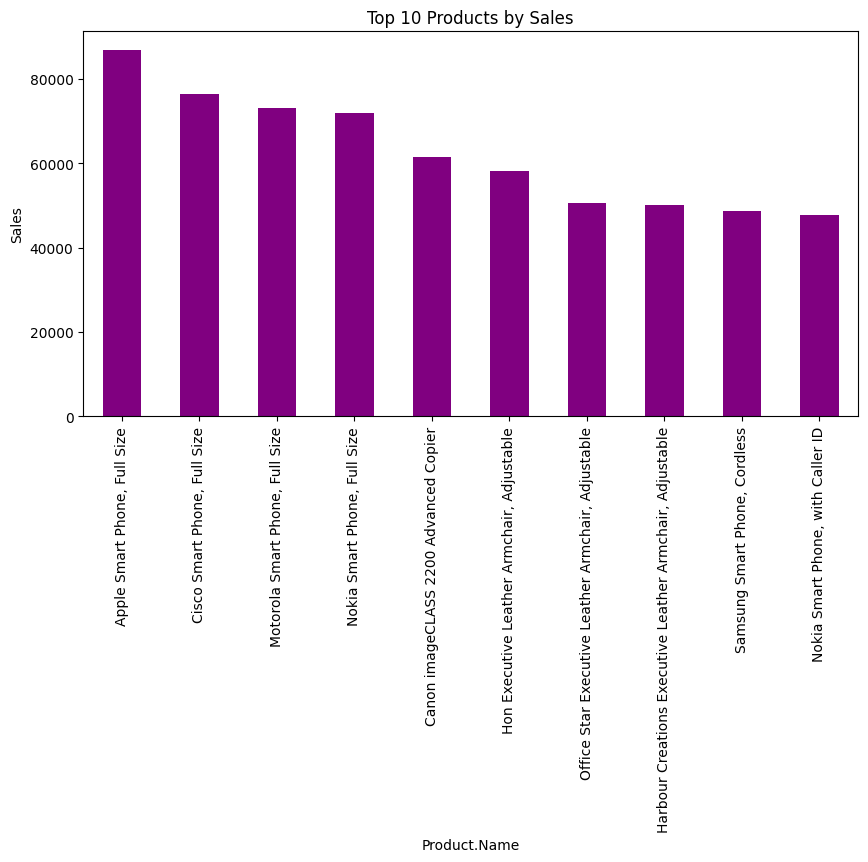

In [13]:
# Top 10 products by sales
top_products = df.groupby('Product.Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', figsize=(10,5), color='purple')
plt.title('Top 10 Products by Sales')
plt.ylabel('Sales')
plt.show()

### 📦 Product Performance — Interpretation

The bar chart shows the top 10 products by total sales.  
We can see that a few products dominate the revenue, suggesting that sales are concentrated among a small number of high-performing items.  
This could indicate opportunities to analyze product pricing, stock levels, and marketing strategies for these key products.

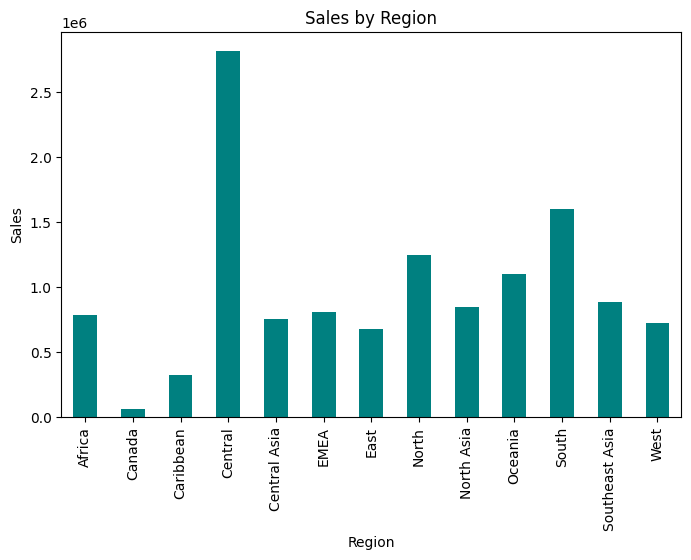

In [14]:
# Sales by Region
region_sales = df.groupby('Region')['Sales'].sum()
region_sales.plot(kind='bar', figsize=(8,5), color='teal')
plt.title('Sales by Region')
plt.ylabel('Sales')
plt.show()

### 🌎 Regional Sales — Interpretation

The plot reveals how total sales vary across regions.  
The **Central region** appears to have the highest sales, followed by the **South region**, while **Canada** and **Caribbean** regions show lower figures.  
This pattern might reflect differences in customer base size, logistics efficiency, or regional marketing reach.

Region
Africa            3.910399
Canada            3.677083
Caribbean         3.973964
Central           4.033642
Central Asia      4.005371
EMEA              3.933386
East              3.909761
North             4.033856
North Asia        3.907613
Oceania           3.932894
South             3.944018
Southeast Asia    4.031640
West              3.930066
Name: Shipping.Time, dtype: float64


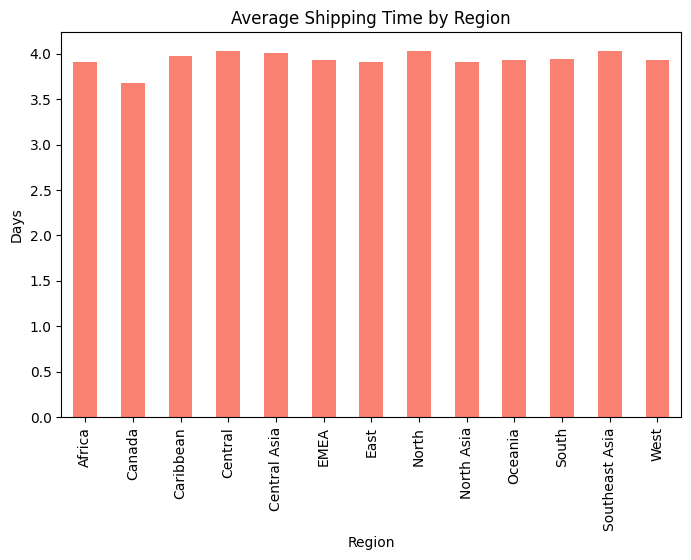

In [15]:
# Average shipping time by Region
region_shipping = df.groupby('Region')['Shipping.Time'].mean()
print(region_shipping)
region_shipping.plot(kind='bar', figsize=(8,5), color='salmon')
plt.title('Average Shipping Time by Region')
plt.ylabel('Days')
plt.show()

### 🚚 Shipping Time — Interpretation

This chart displays the average shipping time per region.  
We can observe that all regions have a mean of 3.9 days. 

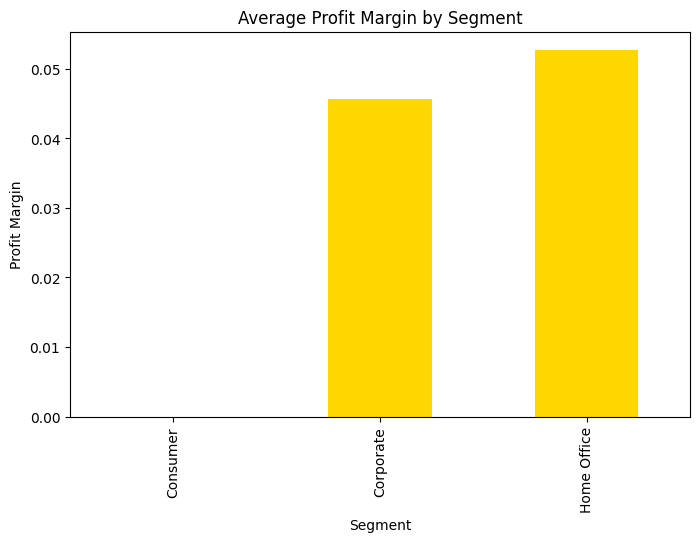

In [16]:
# Profit Margin by Segment
segment_profit = df.groupby('Segment')['Profit.Margin'].mean()
segment_profit.plot(kind='bar', figsize=(8,5), color='gold')
plt.title('Average Profit Margin by Segment')
plt.ylabel('Profit Margin')
plt.show()

### 💰 Profit Margin by Customer Segment — Interpretation

This visualization compares the average profit margin across customer segments.  
The **Corporate** and **Home Office** segments tend to have higher profit margins than the **Consumer** segment.  
This suggests that business clients might be more profitable, potentially due to larger or more consistent orders.  
Such insights can guide targeted marketing and pricing strategies.

C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 35760 (\N{CJK UNIFIED IDEOGRAPH-8BB0}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 24405 (\N{CJK UNIFIED IDEOGRAPH-5F55}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\everi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: 

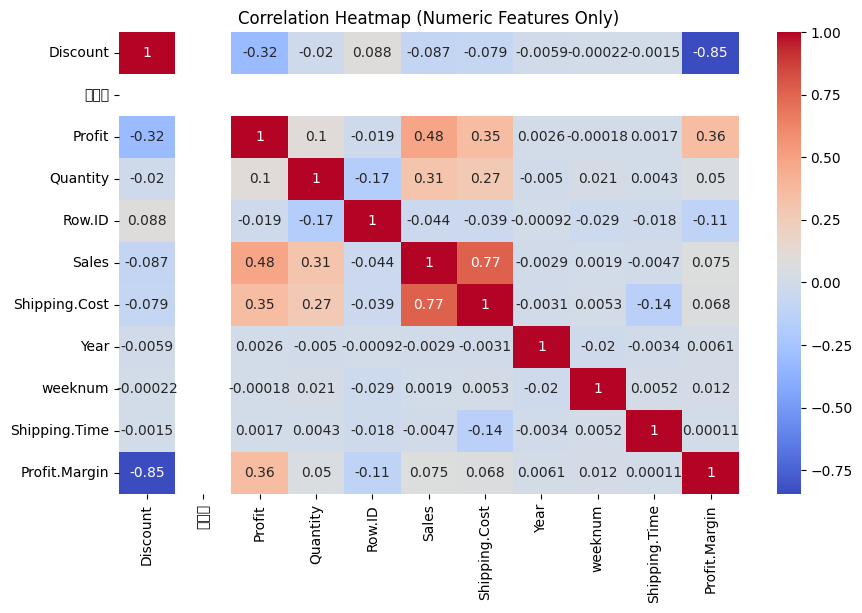

In [17]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

### 🔍 Correlation Analysis — Interpretation

From the correlation heatmap, we can observe the following insights:

The correlation matrix reveals a **strong negative correlation** between **Discount and Profit Margin** (-0.85), indicating that higher discounts significantly reduce profit margins.

Additionally, **Sales and Shipping Cost** (0.77) show a **strong positive correlation**, which suggests that higher sales volumes are associated with increased shipping expenses.

These relationships highlight the importance of optimizing discount strategies and shipping efficiency to maintain profitability.

## Overal Conclusion
The analysis reveals key patterns in sales, profitability, and logistics. Most shipments are completed within four days, though some delays suggest potential areas for optimization. Both sales and profit are highly concentrated among a few top-performing products and regions, particularly in the Central area.

Additionally, there is a negative impact of discounts on profit margins, while higher sales volumes are linked to increased shipping costs. The Corporate and Home Office segments show higher profit margins, indicating that business clients are generally more profitable.

Overall, these insights can help guide strategic decisions in pricing, discount policies, and logistics management to enhance overall profitability.

## Conclusión general (Versión en español)

El análisis revela patrones clave en las ventas, rentabilidad y logística. La mayoría de los envíos se completan en menos de cuatro días, aunque existen algunos retrasos que podrían optimizarse. Las ventas y ganancias presentan una fuerte concentración en unos pocos productos y regiones, especialmente en la zona Central.

Además, se identificó que los descuentos impactan negativamente en el margen de beneficio, mientras que un mayor volumen de ventas tiende a aumentar los costos de envío. Los segmentos Corporate y Home Office generan mayores márgenes de ganancia, lo que sugiere que son los clientes más rentables.

En conjunto, estos hallazgos pueden guiar decisiones estratégicas sobre precios, descuentos y gestión logística para mejorar la rentabilidad general.